In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

# NLP
import nltk
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [2]:
#combine all meatless farm data

In [3]:
mfbm = pd.read_csv('../Datasets/MFBurgerMeat.csv')
mfmm = pd.read_csv('../Datasets/MFMinceMeat.csv')[['reviewer_name', 'title', 'body', 'ratings']]
mfs = pd.read_csv('../Datasets/MFSausage.csv')[['reviewer_name', 'body', 'ratings']]
mfgm = pd.read_csv('../Datasets/MFGroundBasedMeat.csv')[['reviewer_name', 'title', 'body', 'ratings']]

In [4]:
mfbm.head()

,title,body,reviewer_name,ratings
0,Not a Beef Replacment; Go for Something Else,Having looked to move away from meat for a whi...,Rhodri,2
1,Shocked my meat-eating friends with these deli...,\n Absolutely brilliant. I jumped on to leave...,Suzie,5
2,Best meatless burgers on the market.,\n Hubby and I were not sure whether to try m...,Veronica Clark,5
3,Worst vegan burger available,\n How could anyone eat these? They taste of ...,Marge,1
4,Truly disgusting,\n Honestly never tried anything quite as rev...,RC,1


In [5]:
mfmm.head()

,reviewer_name,title,body,ratings
0,Chloe,Mixed emotions,\n I have tried many different meat/mince alte...,3
1,Martina,Delicious meatless mince!!,\n I am Italian and as a good Italian I love l...,5
2,Rogerio,Worst meat alternative,\n This must be the worst meat alternative eve...,1
3,Chris,Smells so bad,"\n Absolutely vile smell when cooking, really ...",1
4,Carol Edwards,Best of the bunch,\n This is the first time I have used this min...,5


In [6]:
#include each category

mfbm['category'] = 'burger_meat'
mfmm['category'] = 'mince_meat'
mfs['category'] = 'sausage'
mfgm['category'] = 'ground_meat'

In [7]:
mfbm.head()

,title,body,reviewer_name,ratings,category
0,Not a Beef Replacment; Go for Something Else,Having looked to move away from meat for a whi...,Rhodri,2,burger_meat
1,Shocked my meat-eating friends with these deli...,\n Absolutely brilliant. I jumped on to leave...,Suzie,5,burger_meat
2,Best meatless burgers on the market.,\n Hubby and I were not sure whether to try m...,Veronica Clark,5,burger_meat
3,Worst vegan burger available,\n How could anyone eat these? They taste of ...,Marge,1,burger_meat
4,Truly disgusting,\n Honestly never tried anything quite as rev...,RC,1,burger_meat


In [8]:
mfgm.head(2)

,reviewer_name,title,body,ratings,category
0,Dream 4 More Book Reviews,try over another brand,"\n I do not like Beyond Crumbles, the taste bu...",3,ground_meat
1,B W,"Bland, Poor Texture",\n This isn't even in the same playing field a...,1,ground_meat


In [9]:
# combine title and body

mfbm['review'] = mfbm['title'] + ' ' + mfbm['body'] 
mfmm['review'] = mfmm['title'] + ' ' + mfmm['body'] 
mfs['review'] = mfs['body']
mfgm['review'] = mfgm['title'] + ' ' + mfgm['body'] 

In [10]:
#drop unwanted columns

mfbm.drop(columns = ['title', 'body'], inplace=True)
mfmm.drop(columns = ['title', 'body'], inplace=True)
mfs.drop(columns = ['body'], inplace=True)
mfgm.drop(columns = ['title', 'body'], inplace=True)

In [11]:
mfbm.head(2)

,reviewer_name,ratings,category,review
0,Rhodri,2,burger_meat,Not a Beef Replacment; Go for Something Else H...
1,Suzie,5,burger_meat,Shocked my meat-eating friends with these deli...


In [12]:
mfmm.head(2)

,reviewer_name,ratings,category,review
0,Chloe,3,mince_meat,Mixed emotions \n I have tried many different ...
1,Martina,5,mince_meat,Delicious meatless mince!! \n I am Italian and...


In [13]:
mfs.head(2)

,reviewer_name,ratings,category,review
0,sarah,3,sausage,Not Bad; These sausages aren't so bad if you s...
1,laura,5,sausage,Meat free Sausages; They were OK nothing speci...


In [14]:
mfgm.head(2)

,reviewer_name,ratings,category,review
0,Dream 4 More Book Reviews,3,ground_meat,try over another brand \n I do not like Beyond...
1,B W,1,ground_meat,"Bland, Poor Texture \n This isn't even in the ..."


In [15]:
# define a function to clean

def clean_text(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[''""...]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub("[^a-zA-Z0-9]+", " ",text)
    text = text.replace('[removed]', '')
    text = text.replace('[deleted]', '')
    text = text.replace('?', '')
    text = text.replace('!', '')
    text = text.replace('()', '')
    text = text.replace(',', '')
    text = text.replace("'", '')
    text = text.replace("http", '')
    
    return text

In [16]:
def lower_case(text):
    
    text = text.lower()
    return text

In [17]:
# lowercase all reviewer names

mfbm['reviewer_name'] = mfbm['reviewer_name'].apply(lower_case)
mfmm['reviewer_name'] = mfmm['reviewer_name'].apply(lower_case)
mfs['reviewer_name'] = mfs['reviewer_name'].apply(lower_case)
mfgm['reviewer_name'] = mfgm['reviewer_name'].apply(lower_case)

In [18]:
# clean the reviews

mfbm['review'] = mfbm['review'].apply(clean_text)
mfmm['review'] = mfmm['review'].apply(clean_text)
mfs['review'] = mfs['review'].apply(clean_text)
mfgm['review'] = mfgm['review'].apply(clean_text)

In [19]:
#check

mfbm.head()

,reviewer_name,ratings,category,review
0,rhodri,2,burger_meat,not a beef replacment go for something else ha...
1,suzie,5,burger_meat,shocked my meat eating friends with these deli...
2,veronica clark,5,burger_meat,best meatless burgers on the market hubby and ...
3,marge,1,burger_meat,worst vegan burger available how could anyone ...
4,rc,1,burger_meat,truly disgusting honestly never tried anything...


In [20]:
mfmm.head(3)

,reviewer_name,ratings,category,review
0,chloe,3,mince_meat,mixed emotions n i have tried many different m...
1,martina,5,mince_meat,delicious meatless mince n i am italian and as...
2,rogerio,1,mince_meat,worst meat alternative n this must be the wors...


In [21]:
mfs.head(2)

,reviewer_name,ratings,category,review
0,sarah,3,sausage,not bad these sausages aren t so bad if you se...
1,laura,5,sausage,meat free sausages they were ok nothing specia...


In [22]:
mfgm.head(2)

,reviewer_name,ratings,category,review
0,dream 4 more book reviews,3,ground_meat,try over another brand n i do not like beyond ...
1,b w,1,ground_meat,bland poor texture n this isn t even in the sa...


In [23]:
MFcombine = pd.concat([mfbm, mfmm, mfs, mfgm])

In [24]:
MFcombine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 42
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewer_name  205 non-null    object
 1   ratings        205 non-null    int64 
 2   category       205 non-null    object
 3   review         205 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.0+ KB


In [25]:
MFcombine

,reviewer_name,ratings,category,review
0,rhodri,2,burger_meat,not a beef replacment go for something else ha...
1,suzie,5,burger_meat,shocked my meat eating friends with these deli...
2,veronica clark,5,burger_meat,best meatless burgers on the market hubby and ...
3,marge,1,burger_meat,worst vegan burger available how could anyone ...
4,rc,1,burger_meat,truly disgusting honestly never tried anything...
5,jason thompson,1,burger_meat,not as good as others i like meatless farm min...
6,sara villa,1,burger_meat,terrible smell even worse taste i bought this ...
7,amy m,1,burger_meat,the worst truly revolting a strange almost che...
8,daniela craciun,5,burger_meat,love it love them
9,esf22,5,burger_meat,very very good amazing taste and texture


In [26]:
MFcombine['ratings'].value_counts()

5    85
1    45
4    38
3    19
2    18
Name: ratings, dtype: int64

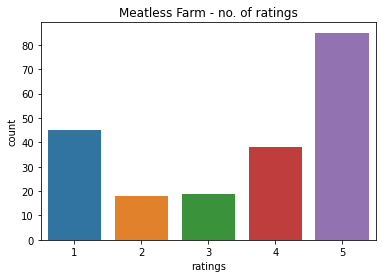

In [27]:
plt.title('Meatless Farm - no. of ratings')
sns.countplot(MFcombine.ratings)

In [28]:
# MFcombine.groupby('category')['ratings'].value_counts()

In [29]:
# tokenisation

tokenizer = RegexpTokenizer(r'\w+', gaps=False)

In [30]:
MFcombine['review_token'] = MFcombine['review'].apply(tokenizer.tokenize)

In [31]:
MFcombine.head()

,reviewer_name,ratings,category,review,review_token
0,rhodri,2,burger_meat,not a beef replacment go for something else ha...,"[not, a, beef, replacment, go, for, something,..."
1,suzie,5,burger_meat,shocked my meat eating friends with these deli...,"[shocked, my, meat, eating, friends, with, the..."
2,veronica clark,5,burger_meat,best meatless burgers on the market hubby and ...,"[best, meatless, burgers, on, the, market, hub..."
3,marge,1,burger_meat,worst vegan burger available how could anyone ...,"[worst, vegan, burger, available, how, could, ..."
4,rc,1,burger_meat,truly disgusting honestly never tried anything...,"[truly, disgusting, honestly, never, tried, an..."


In [32]:
# stop words

stopwords_basic = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'browser', 'support', 'video', 'n']

In [33]:
MFcombine['review_token_stop'] = MFcombine['review_token'].apply(lambda x: [item for item in x if item not in stopwords_basic])

In [34]:
MFcombine.head()

,reviewer_name,ratings,category,review,review_token,review_token_stop
0,rhodri,2,burger_meat,not a beef replacment go for something else ha...,"[not, a, beef, replacment, go, for, something,...","[beef, replacment, go, something, else, looked..."
1,suzie,5,burger_meat,shocked my meat eating friends with these deli...,"[shocked, my, meat, eating, friends, with, the...","[shocked, meat, eating, friends, delicious, th..."
2,veronica clark,5,burger_meat,best meatless burgers on the market hubby and ...,"[best, meatless, burgers, on, the, market, hub...","[best, meatless, burgers, market, hubby, sure,..."
3,marge,1,burger_meat,worst vegan burger available how could anyone ...,"[worst, vegan, burger, available, how, could, ...","[worst, vegan, burger, available, could, anyon..."
4,rc,1,burger_meat,truly disgusting honestly never tried anything...,"[truly, disgusting, honestly, never, tried, an...","[truly, disgusting, honestly, never, tried, an..."


In [35]:
# test = " ".join(review for review in MFcombine['review'])

In [36]:
# try to lemmatise

def lem(x):
#-----------------------------------
# Input:
# x - post text
# Output:
# string of lemmatized words
#-----------------------------------
    lemmatizer = WordNetLemmatizer()
    
    #lemmatize words
    lemm_words = [lemmatizer.lemmatize(word.lower()) for word in x]
    
    #return lemmatized and stem words in a string
    return ' '.join(lemm_words)  

In [37]:
MFcombine['review_token_stop_lem'] = MFcombine['review_token_stop'].apply(lem)

In [38]:
MFcombine.head()

,reviewer_name,ratings,category,review,review_token,review_token_stop,review_token_stop_lem
0,rhodri,2,burger_meat,not a beef replacment go for something else ha...,"[not, a, beef, replacment, go, for, something,...","[beef, replacment, go, something, else, looked...",beef replacment go something else looked move ...
1,suzie,5,burger_meat,shocked my meat eating friends with these deli...,"[shocked, my, meat, eating, friends, with, the...","[shocked, meat, eating, friends, delicious, th...",shocked meat eating friend delicious thing abs...
2,veronica clark,5,burger_meat,best meatless burgers on the market hubby and ...,"[best, meatless, burgers, on, the, market, hub...","[best, meatless, burgers, market, hubby, sure,...",best meatless burger market hubby sure whether...
3,marge,1,burger_meat,worst vegan burger available how could anyone ...,"[worst, vegan, burger, available, how, could, ...","[worst, vegan, burger, available, could, anyon...",worst vegan burger available could anyone eat ...
4,rc,1,burger_meat,truly disgusting honestly never tried anything...,"[truly, disgusting, honestly, never, tried, an...","[truly, disgusting, honestly, never, tried, an...",truly disgusting honestly never tried anything...


In [39]:
MFcombine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 42
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   reviewer_name          205 non-null    object
 1   ratings                205 non-null    int64 
 2   category               205 non-null    object
 3   review                 205 non-null    object
 4   review_token           205 non-null    object
 5   review_token_stop      205 non-null    object
 6   review_token_stop_lem  205 non-null    object
dtypes: int64(1), object(6)
memory usage: 17.8+ KB


In [40]:
# get top words WITHOUT stop words / lemmatize

In [41]:
high_rating = MFcombine[MFcombine['ratings'] >= 4]

In [42]:
low_rating = MFcombine[MFcombine['ratings'] <= 2]

In [43]:
#without stop words / lemmatising / stemming

TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(low_rating['review'])

len_features = len(tf.get_feature_names())
print(len_features)

MFcombine_cv_tf = pd.DataFrame(tf.transform(low_rating['review']).todense(),columns=tf.get_feature_names())

print('Low rating important one-word')
top_MFCombine_tf = MFcombine_cv_tf.sum(axis=0)
top_MFCombine_tf.sort_values(ascending = False).head(20)

734
Low rating important one-word


and       4.607423
not       4.423589
the       4.219301
it        4.054325
to        3.511629
as        3.444354
taste     3.330714
like      3.219540
meat      2.653210
of        2.588833
for       2.562220
burger    2.544091
beyond    2.463934
these     2.456556
good      2.418387
this      2.357867
they      2.155734
but       2.142421
is        2.070622
tastes    1.798018
dtype: float64

In [44]:
#bi-gram

TfidfVectorizer

tf = TfidfVectorizer(ngram_range = (2,2))
tf.fit(low_rating['review'])

len_features = len(tf.get_feature_names())
print(len_features)

MFcombine_cv_tf = pd.DataFrame(tf.transform(low_rating['review']).todense(),columns=tf.get_feature_names())

top_MFCombine_tf = MFcombine_cv_tf.sum(axis=0)
top_MFCombine_tf.sort_values(ascending = False).head(20)

1989


not good            1.596823
beyond burger       1.250672
gross gross         1.000000
yuck taste          0.820981
tastes like         0.801097
taste like          0.757706
cat food            0.713995
dog food            0.709531
buy again           0.697305
much better         0.693312
at all              0.679854
this product        0.673796
do not              0.663100
not as              0.649804
meat alternative    0.632264
it has              0.620267
like dog            0.619150
meat free           0.612547
as good             0.599125
good as             0.599125
dtype: float64

In [45]:
# tri-gram

TfidfVectorizer

tf = TfidfVectorizer(ngram_range = (3,3))
tf.fit(low_rating['review'])

len_features = len(tf.get_feature_names())
print(len_features)

MFcombine_cv_tf = pd.DataFrame(tf.transform(low_rating['review']).todense(),columns=tf.get_feature_names())

top_MFCombine_tf = MFcombine_cv_tf.sum(axis=0)
top_MFCombine_tf.sort_values(ascending = False).head(20)

2214


as good as                0.596213
not for me                0.547381
yuck taste like           0.500000
dog food smells           0.500000
taste like dog            0.500000
like dog food             0.500000
good as the               0.488418
as tasty as               0.485665
tasty as beyond           0.485665
as beyond burger          0.485665
smell when cooking        0.444894
amp didn cook             0.408248
blaghh bland dry          0.408248
just not good             0.408248
bad unnatural flavor      0.408248
substitute option yuck    0.408248
not good just             0.408248
not good meat             0.408248
good bad unnatural        0.408248
not good bad              0.408248
dtype: float64

In [46]:
# WITH stopwords and lemmatizing

In [47]:
#TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(low_rating['review_token_stop_lem'])

len_features = len(tf.get_feature_names())
print(len_features)

MFcombine_cv_tf = pd.DataFrame(tf.transform(low_rating['review_token_stop_lem']).todense(),columns=tf.get_feature_names())

top_MFCombine_tf = MFcombine_cv_tf.sum(axis=0)
top_MFCombine_tf.sort_values(ascending = False).head(20)

601


taste      4.846124
burger     3.905043
like       3.866870
meat       3.247726
beyond     2.978500
good       2.844709
smell      2.366274
texture    2.154077
tried      2.127186
dry        2.104891
food       2.055599
awful      1.915918
vegan      1.904046
would      1.885418
buy        1.875747
product    1.846258
really     1.770404
even       1.733514
flavor     1.678427
better     1.618280
dtype: float64

In [48]:
#bi-gram

TfidfVectorizer

tf = TfidfVectorizer(ngram_range = (2,2))
tf.fit(low_rating['review_token_stop_lem'])

len_features = len(tf.get_feature_names())
print(len_features)

MFcombine_cv_tf = pd.DataFrame(tf.transform(low_rating['review_token_stop_lem']).todense(),columns=tf.get_feature_names())

top_MFCombine_tf = MFcombine_cv_tf.sum(axis=0)
top_MFCombine_tf.sort_values(ascending = False).head(20)

1181


beyond burger        1.675238
taste like           1.567360
gross gross          1.000000
cat food             0.899150
yuck taste           0.850282
meat free            0.838033
meat alternative     0.836633
taste much           0.832411
vegan burger         0.823625
much better          0.812335
dog food             0.794438
like dog             0.665934
burger available     0.660913
worst meat           0.640349
worst vegan          0.636265
beyond impossible    0.627514
beyond meat          0.599772
like meat            0.595799
tasty beyond         0.593910
waste money          0.573248
dtype: float64

In [49]:
#tri-gram

TfidfVectorizer

tf = TfidfVectorizer(ngram_range = (3,3))
tf.fit(low_rating['review_token_stop_lem'])

len_features = len(tf.get_feature_names())
print(len_features)

MFcombine_cv_tf = pd.DataFrame(tf.transform(low_rating['review_token_stop_lem']).todense(),columns=tf.get_feature_names())

top_MFCombine_tf = MFcombine_cv_tf.sum(axis=0)
top_MFCombine_tf.sort_values(ascending = False).head(20)

1219


taste much better           0.734881
vegan burger available      0.681140
tasty beyond burger         0.626907
snuff average taste         0.577350
good good bad               0.577350
average taste bother        0.577350
good bad unnatural          0.577350
dry snuff average           0.577350
bad unnatural flavor        0.577350
worst vegan burger          0.557196
spaghetti fitting yuck      0.500000
yuck taste like             0.500000
like dog food               0.500000
dog food smell              0.500000
come spaghetti fitting      0.500000
like playdough come         0.500000
taste like dog              0.500000
playdough come spaghetti    0.500000
cook like meat              0.447214
good meat substitute        0.447214
dtype: float64

In [50]:
# high rating

TfidfVectorizer

tf = TfidfVectorizer(ngram_range = (2,2))
tf.fit(high_rating['review'])

len_features = len(tf.get_feature_names())
print(len_features)

MFcombine_cv_tf = pd.DataFrame(tf.transform(high_rating['review']).todense(),columns=tf.get_feature_names())

top_MFCombine_tf = MFcombine_cv_tf.sum(axis=0)
top_MFCombine_tf.sort_values(ascending = False).head(20)

3055


they are            2.148557
meat free           1.684549
plant based         1.673058
really tasty        1.553553
taste like          1.467691
the taste           1.344508
these are           1.334870
this is             1.267728
tasty and           1.239383
better than         1.193299
the texture         1.190192
they were           1.169333
good alternative    1.131599
like meat           1.130718
the best            1.099033
really good         1.078536
very good           1.068794
alternative to      1.063630
and texture         1.049587
these sausages      1.047770
dtype: float64

In [68]:
#uni-gram

TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(high_rating['review_token_stop_lem'])

len_features = len(tf.get_feature_names())
print(len_features)

MFcombine_cv_tf = pd.DataFrame(tf.transform(high_rating['review_token_stop_lem']).todense(),columns=tf.get_feature_names())

top_MFCombine_tf = MFcombine_cv_tf.sum(axis=0)
top_MFCombine_tf.sort_values(ascending = False).head(20)

712


good           8.898934
meat           8.513124
sausage        7.656642
great          7.180121
taste          6.498201
like           5.107623
really         4.955256
texture        4.920406
alternative    4.809539
love           4.700410
tasty          4.571757
vegan          4.288988
burger         3.640759
product        3.416320
meatless       3.356517
delicious      3.273010
free           3.233148
best           2.973688
flavour        2.893213
tried          2.832703
dtype: float64

In [52]:
#bi-gram

TfidfVectorizer

tf = TfidfVectorizer(ngram_range = (2,2))
tf.fit(high_rating['review_token_stop_lem'])

len_features = len(tf.get_feature_names())
print(len_features)

MFcombine_cv_tf = pd.DataFrame(tf.transform(high_rating['review_token_stop_lem']).todense(),columns=tf.get_feature_names())

top_MFCombine_tf = MFcombine_cv_tf.sum(axis=0)
top_MFCombine_tf.sort_values(ascending = False).head(20)

1893


plant based             2.111303
meat free               2.090203
taste like              1.981176
really tasty            1.939036
good alternative        1.494902
really good             1.353581
like meat               1.328219
great alternative       1.209220
beyond burger           1.193050
like real               1.130857
meat alternative        1.125123
meat substitute         1.112609
taste texture           1.106828
meat sausage            1.102341
meatless burger         1.092693
great taste             1.065118
veggie sausage          1.022712
taste good              1.012771
great meat              1.011843
definitely recommend    1.008312
dtype: float64

In [53]:
text_high = " ".join(review for review in high_rating['review_token_stop_lem'])

In [54]:
from wordcloud import WordCloud, ImageColorGenerator

wordcloud_high = WordCloud(background_color="white").generate(text_high)

In [55]:
wordcloud_high

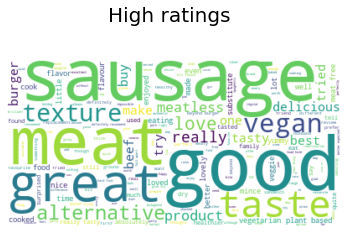

In [56]:
fig = plt.figure()

plt.imshow(wordcloud_high, interpolation='bilinear')
plt.axis("off")
fig.suptitle('High ratings\n', fontsize=20)
# plt.title('High ratings\n')
plt.show()

In [57]:
text_low = " ".join(review for review in low_rating['review_token_stop_lem'])

In [58]:
from wordcloud import WordCloud, ImageColorGenerator

wordcloud_low = WordCloud(background_color="white").generate(text_low)

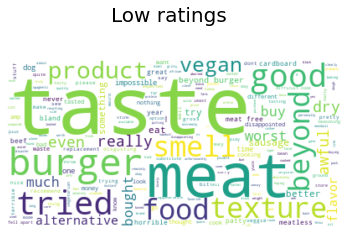

In [59]:
fig = plt.figure()

plt.imshow(wordcloud_low, interpolation='bilinear')
plt.axis("off")

fig.suptitle('Low ratings\n', fontsize=20)
# plt.title('Low ratings\n')
plt.show()

In [60]:
#without stop words

In [61]:
text_low_alt = " ".join(review for review in low_rating['review'])

In [62]:
wordcloud_low_alt = WordCloud(background_color="white").generate(text_low_alt)

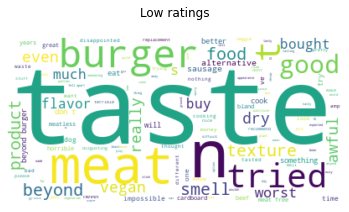

In [63]:
plt.imshow(wordcloud_low_alt, interpolation='bilinear')
plt.axis("off")
plt.title('Low ratings\n')
plt.show()

In [64]:
# save the combined MF file

In [65]:
# MFcombine.to_csv('MFCombine.csv')